In [91]:
"""Jupyter Notebook for finding the hard-soft boundary 
    we will use to define our binary population given by cosmic
    HS Cutoff period should be longer for OCs (less dense) 
    and shorter for GCs (more densely packed)"""

'Jupyter Notebook for finding the hard-soft boundary \n    we will use to define our binary population given by cosmic\n    HS Cutoff period should be longer for OCs (less dense) \n    and shorter for GCs (more densely packed)'

In [92]:
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.sample.sampler import multidim
from cosmic.evolve import Evolve

In [93]:
import numpy as np
import matplotlib.pyplot as plt

In [94]:
# Dictionary neeeded for evolving the binaries
BSEDict = {'xi': 0.5, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 0,\
           'alpha1': 1.0, 'pts1': 0.05, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, \
           'hewind': 1.0, 'ck': -1000, 'bwind': 0.0, 'lambdaf': 1.0, 'mxns': 3.0, \
           'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'nsflag': 3, 'ceflag': 0, 'eddfac': 1.0, \
           'merger': 0, 'ifflag': 0, 'bconst': -3000, 'sigma': 265.0, 'gamma': -2.0, \
           'ppsn': 1, 'natal_kick_array' :[-100.0,-100.0,-100.0,-100.0,-100.0,-100.0], \
           'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, \
           'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],\
           'cekickflag' : 0, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsnp' : 2.5, \
           'ecsn_mlow' : 1.6, 'aic' : 1, 'sigmadiv' :-20.0}

In [95]:
final_kstar1 = [11,12]
final_kstar2 = [10]

# Sampling initial binaries - pulled from cosmic's documentation
InitialBinaries, sampled_mass, n_sampled = InitialBinaryTable.sampler('multidim', [0,14], [0,14], \
                            2,1, SFH_model='delta_burst', \
                            component_age=10000.0, met=0.02, size=10000)

In [96]:
p_i = InitialBinaries['porb'] #given in days *i think: https://cosmic-popsynth.github.io/examples/index.html


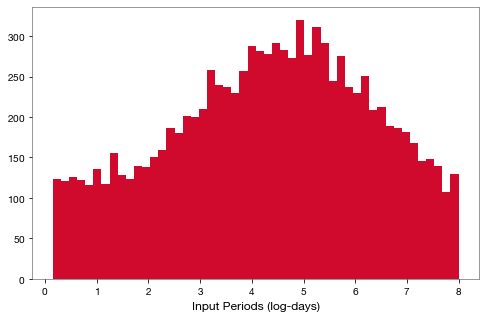

In [97]:
# Initial Binary Period Histogram
f,ax = plt.subplots(figsize = (8,5))

ax.hist(np.log10(p_i), bins = 50, color = '#CF0A2C')
ax.set_xlabel('Input Periods (log-days)')
ax.grid(None)
# Cutoff periods must be set by cosmic

In [98]:
# Evolving the binaries
bpp, bcm, initC  = Evolve.evolve(initialbinarytable=InitialBinaries, BSEDict=BSEDict)

In [99]:
p_f = bcm['porb']
print(p_f.loc[np.where(p_f <0)])

Series([], Name: porb, dtype: float64)


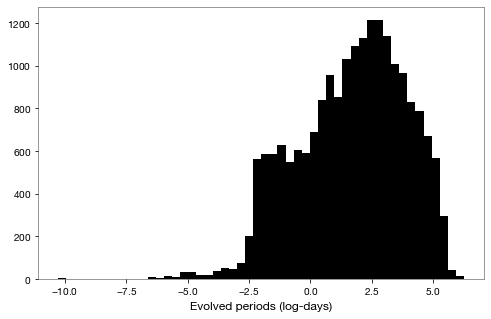

In [100]:
# Evolved Binary Histogram - Period

f,ax = plt.subplots(figsize = (8,5))
ax.hist(np.log10(p_f), bins = 50, color = 'black')

ax.set_xlabel('Evolved periods (log-days)')
ax.grid(None)

In [101]:
#Making copy of bcm to manipulate
EvolvedBinaries = bcm

In [102]:
# Using hard-soft cutoff from Aaron's paper: arXiv:1506.08830
m1_f = bcm['mass_1']
m2_f = bcm['mass_2']

# Total mass of evolved binaries
m3 = m1_f.add(m2_f)#Duplicates present with different t
EvolvedBinaries['m3'] = m3#m3 is the mass of the incoming (disrupting object)


In [103]:
# Getting cluster velocity dispersion values will loop through to find hs cutoff
import pandas as pd
GC_sigma = pd.read_csv('/Users/andrewbowen/ceb_project/cosmic_pop/gc-sigma.txt', names = ['index','sigma_v'])
OC_sigma = pd.read_csv('/Users/andrewbowen/ceb_project/cosmic_pop/oc-sigma.txt', names = ['index','sigma_v'])

# Pulling only sigma values (no indices)
gc_sigma = GC_sigma['sigma_v']
oc_sigma = OC_sigma['sigma_v']

print(gc_sigma)

0      12.388962
1       0.000000
2      11.187387
3       0.000000
4       6.667342
5       0.000000
6       0.000000
7       0.000000
8       0.000000
9      11.411948
10      7.883908
11      3.439950
12      5.457761
13      0.000000
14      0.000000
15     16.673228
16      0.000000
17      0.000000
18      4.847198
19      0.000000
20      0.000000
21      3.444542
22      4.640216
23      0.000000
24      4.626147
25      6.606004
26      6.975154
27      2.042282
28     13.518913
29      7.529252
         ...    
127     6.000048
128     9.357500
129     0.000000
130     6.438904
131     0.000000
132     6.388262
133    13.011301
134     3.774333
135     6.177821
136     0.000000
137     7.777288
138     7.383591
139     5.765937
140     0.000000
141     0.000000
142     0.000000
143     5.106917
144     0.000000
145     0.000000
146     3.136052
147    10.212815
148     5.758525
149     3.938549
150     0.000000
151     0.000000
152     0.000000
153     6.540604
154     0.0000

In [104]:
# Use sigma = 1km/s for now, will plug in cluster values later
def get_Phs(m1, m2, m3, sigma):
    const = (np.pi*(6.67*10**-20)/np.sqrt(2))
    Phs = const*(np.sqrt((m1*m2)/m3)**3)/((np.sqrt(m1+m2))*sigma**3)
    return Phs


In [105]:
names_gc = ['ID_x', 'Name', 'RA', 'DEC', 'L','B','R_Sun','R_gc','X','Y', 'Z', 'key_0','[Fe/H]_x', 'wt', 'E(B-V)_x',\
 'V_HB','(m-M)V_x', 'V_t', 'M_V,t', 'U-B', 'B-V', 'V-R', 'V-I', 'spt', 'ellip', 'ID_y', 'v_r', '+/-', 'v_LSR' ,'sig_v' ,'+/-.1', 'c', 'r_c', 'r_h', 'mu_V',\
  'rho_', 'lg(tc)', 'lg(th)', 'Mcl[Msun]', 'rh[pc]', '[Fe/H]_y', 'age[Gyr]', '(m-M)V_y', 'E(B-V)_y', 'log10(rho[Msun]/pc^3)',\
 'rc', 'sigma0[km/s]', 'esigma0[km/s]', 'fb', 'efb', '[M/H]', 'Rgc[kpc]','Rsun[kpc]']

# names in OC datafile
names_oc = ['Cluster_name', 'RA', 'DEC', 'l', 'b', 'Dist Mod', 'EB-V', 'Age', 'ST' ,'Z', 'Diam', 'Fe/H', 'MRV',\
 'pm RA', 'pm Dec', 'logM[Msun]', 'rtP[pc]', 'log(t[yr])K', 'rcK[pc]', 'rtK[pc]', 'Rhm[pc]',\
  '[Fe/H]K]', 'deltaV', 'sigdV', '[FeH]', 'sigFeH', 't', 'sigt', 'logt' ,'Rgc' ,'z' ,'Diam[pc]', 'd[pc]']
path = '/Users/andrewbowen/ceb_project/cosmic_pop/'

# Globular cluster read in
GCs = pd.read_csv(path + 'gc_data.txt', sep = ' ', header = 0, names = names_gc)
# Open Cluster file read in
OCs = pd.read_csv(path + 'oc_data.txt', sep = ' ', header = 0)

In [106]:
# Looping through Globular Clusters
p = []
for index, row in EvolvedBinaries.iterrows():
    m1 = row['mass_1'] * (2*10**30)#converting to kilograms from solar masses
    m2 = row['mass_2'] * (2*10**30)
    m3 = (1.5*2*10**30)
    period_cutoff = get_Phs(m1, m2, m3, 2.28)
    p.append(period_cutoff)
print(p)

/Users/andrewbowen/anaconda3/envs/cosmic/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


[330941379.49634165, 330941379.49634165, 1357888136.2732584, 369711084.5043994, 374986826.9038212, 374986826.9038212, 67181785.46375437, 67181785.46375437, 313061200.75165325, 313061200.75165325, 32908277720.83093, 5842672502.299207, 1205682154.4525008, 1205682154.4525008, 105141808.1348468, 105141808.1348468, 3112574621.271935, 3112574621.271935, 194670459.98684904, 194670459.98684904, 169297057.04124132, 169297057.04124132, 715229068.314585, 715229068.314585, 27522878260.1203, 0.0, 5928117038.465822, 5928117038.465822, 959820168.1734815, 959820168.1734815, 523532980.63747877, 523532980.63747877, 7951014974.101472, 7951014974.101472, 35964483.075046375, 35964483.075046375, 1092108502.81403, 1092108502.81403, 1952688274.470974, 1952688274.470974, 248269439.73850498, 248269439.73850498, 22137427127.09838, 0.0, 109263949.76425405, 109263949.76425405, 5508412981.030014, 5508412981.030014, 10816652711.537006, 4163941595.348672, 359852334.30885077, 359852334.30885077, 180744310.21984679, 18

/Users/andrewbowen/anaconda3/envs/cosmic/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


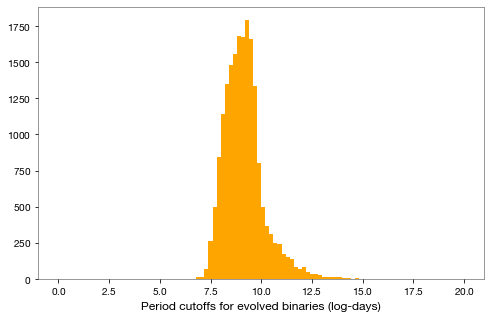

In [107]:
f,ax = plt.subplots(figsize = (8,5))
ax.hist(np.log10(p), bins = 100,range = (0,20), color = 'orange')
ax.set_xlabel('Period cutoffs for evolved binaries (log-days)')
ax.grid(None)
f.savefig('/Users/andrewbowen/ceb_project/cosmic_pop/plots_cosmic/hs-cutoff-hist.png')

In [116]:
## Adding velocity dispersion columns to dataframe
GCs['sigma_v'] = gc_sigma
OCs['sigma_v'] = oc_sigma
print(GCs['sigma_v'])

0      12.388962
1       0.000000
2      11.187387
3       0.000000
4       6.667342
5       0.000000
6       0.000000
7       0.000000
8       0.000000
9      11.411948
10      7.883908
11      3.439950
12      5.457761
13      0.000000
14      0.000000
15     16.673228
16      0.000000
17      0.000000
18      4.847198
19      0.000000
20      0.000000
21      3.444542
22      4.640216
23      0.000000
24      4.626147
25      6.606004
26      6.975154
27      2.042282
28     13.518913
29      7.529252
         ...    
127     6.000048
128     9.357500
129     0.000000
130     6.438904
131     0.000000
132     6.388262
133    13.011301
134     3.774333
135     6.177821
136     0.000000
137     7.777288
138     7.383591
139     5.765937
140     0.000000
141     0.000000
142     0.000000
143     5.106917
144     0.000000
145     0.000000
146     3.136052
147    10.212815
148     5.758525
149     3.938549
150     0.000000
151     0.000000
152     0.000000
153     6.540604
154     0.0000

In [109]:
""" Going to loop through clusters and binary pop (1k binaries for now - speed) 
    and get a period cutoff (get_phs) for each binary (using cluster velo dispersion)"""

' Going to loop through clusters and binary pop (1k binaries for now - speed) \n    and get a period cutoff (get_phs) for each binary (using cluster velo dispersion)'

In [115]:
# Looping through everything to get period cutoff
gc_phs = []#going to be a list of the average period cutoff for every GC
for index, cluster in GCs.iterrows():
    sigma = cluster['sigma_v']
    bin_p = []#list of binary periods for each cluster
    for index, binary in EvolvedBinaries.iterrows():
        
        m1 = binary['mass_1'] * (2*10**30)#converting to kilograms from solar masses
        m2 = binary['mass_2'] * (2*10**30)
        m3 = (1.5*2*10**30)
#         Checking for calculated cluster sigma value, if not we'll feed it a given sigma value
        if cluster['sigma_v']:
            period_cutoff = get_Phs(m1, m2, m3, sigma)
        else:
            period_cutoff = get_Phs(m1,m2,m3,2)
        if np.isfinite(period_cutoff):#only will calculate average cutoff if the value is finite
            bin_p.append(period_cutoff)#Appending cutoffs to list
    cluster_cutoff = np.mean(bin_p)#finding average of cutoffs (one average for each cluster)
    gc_phs.append(cluster_cutoff)
print(gc_phs)

/Users/andrewbowen/anaconda3/envs/cosmic/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


[2657175674.385575, 631589703411.3987, 3608602488.113837, 631589703411.3987, 17047743227.271374, 631589703411.3987, 631589703411.3987, 631589703411.3987, 631589703411.3987, 3399740006.7679906, 10310990525.017582, 124127672780.3355, 31080038028.092796, 631589703411.3987, 631589703411.3987, 1090099028.278375, 631589703411.3987, 631589703411.3987, 44366249646.44543, 631589703411.3987, 631589703411.3987, 123631944931.32433, 50572049509.67634, 631589703411.3987, 51034825640.65038, 17527036004.91915, 14888934255.94169, 593168647778.1602, 2045029949.8300033, 11837759719.81844, 3135655376.5655956, 631589703411.3987, 318984317829.21735, 53991721936.41014, 23111482238.780922, 631589703411.3987, 5928572769.782646, 631589703411.3987, 132829148308.55727, 5514072650.793629, 11166238703.260477, 31565938206.551468, 631589703411.3987, 6180072295.998, 631589703411.3987, 631589703411.3987, 3830110781.184762, 31290920999.348072, 98434838898.2725, 94542050838.17772, 5336275420.35, 631589703411.3987, 431674

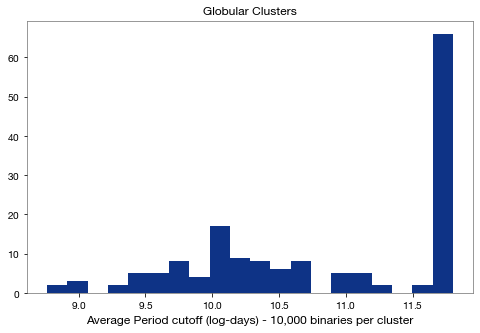

In [126]:
# Histogram of average period cutoff for Globular Clusters
f,ax = plt.subplots(figsize = (8,5))
ax.hist(np.log10(gc_phs), bins = 20, color = '#0E3386')
ax.set_xlabel('Average Period cutoff (log-days) - 10,000 binaries per cluster')
ax.set_title('Globular Clusters')
f.savefig('/Users/andrewbowen/ceb_project/cosmic_pop/plots_cosmic/gc-avg-hsperiod.png')
ax.grid(False)

In [112]:
# Same as above, but for Open Clusters
oc_phs = []#going to be a list of the average period cutoff for every GC
for index, cluster in OCs.iterrows():
    sigma = cluster['sigma_v']
    bin_p = []#list of binary periods for each cluster
    for index, binary in EvolvedBinaries.iterrows():
#         if sigma != 0:#caclulating only if we have a sgima value for GCs
        m1 = binary['mass_1'] * (2*10**30)#converting to kilograms from solar masses
        m2 = binary['mass_2'] * (2*10**30)
        m3 = (1.5*2*10**30)
    #         sigma = cluster['sigma_v']
        period_cutoff = get_Phs(m1, m2, m3, sigma)
        if cluster['sigma_v']:
            period_cutoff = get_Phs(m1, m2, m3, sigma)
        else:
            period_cutoff = get_Phs(m1,m2,m3,2)
        if np.isfinite(period_cutoff):
            bin_p.append(period_cutoff)
    cluster_cutoff = np.mean(bin_p)#finding average of cutoffs (one average for each cluster)
    oc_phs.append(cluster_cutoff)#Appending averages to a list, length should match len(OCs)
print(oc_phs)

/Users/andrewbowen/anaconda3/envs/cosmic/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
/Users/andrewbowen/anaconda3/envs/cosmic/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 6552756944330143.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [113]:
print(len(oc_phs))

1801


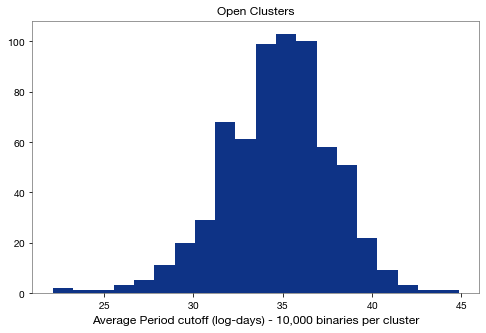

In [127]:
# Histogram of average period cutoff for Open Clusters
f,ax = plt.subplots(figsize = (8,5))
ax.hist(np.log(oc_phs), bins = 20, color = '#0E3386')
ax.set_xlabel('Average Period cutoff (log-days) - 10,000 binaries per cluster')
ax.set_title('Open Clusters')
f.savefig('/Users/andrewbowen/ceb_project/cosmic_pop/plots_cosmic/oc-avg-hsperiod.png')
ax.grid(None)